###### Python mini-tutorial
### provided by Matthew Humphreys

#### 201009

#### basic pandas
##### 

In [2]:
#import pandas
# pandas is a data analysis and manipulation tool
import pandas as pd

In [6]:
# import dataset - ignore invalid data (-9999)
data = pd.read_csv('../raw_data/GLODAPv2.2020_Indian_Ocean.csv', na_values=-9999)
# subset
surface = data['depth'] < 20

In [7]:
# add a column to the table
data['ts'] = data['temperature'] * data['salinity']

In [14]:
#import a .tab file
# change the sep(erator) from , (default) to a tab
# skip the first 55 row, because it has irrelevant data
cocco = pd.read_csv('../raw_data/Poulton-etal_2018.tab', sep='\t', skiprows=55)

<AxesSubplot:xlabel='tco2', ylabel='talk'>

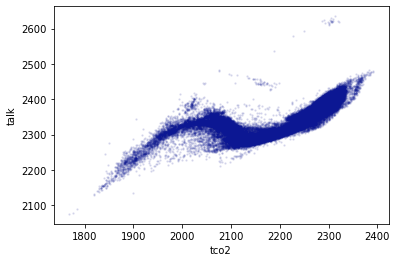

In [18]:
# make a plot
data.plot.scatter('tco2', 'talk', s=2, c='xkcd:royal', alpha = 0.1)
#s = size of markers
#c = color (xkcd color names https://blog.xkcd.com/2010/05/03/color-survey-results/)
#alpha = transparancy

<AxesSubplot:xlabel='tco2', ylabel='talk'>

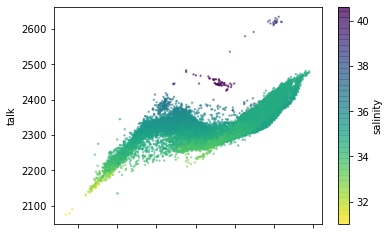

In [19]:
#color shades c = 'column name'
#colormap = cmap google matplotlib colormaps _r = reversed colormap
# s = size of dots
data.plot.scatter('tco2', 'talk', s=2, c='salinity', alpha = 0.5, cmap='viridis_r')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

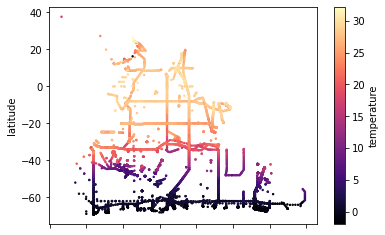

In [20]:
# map plot.scatter('x-axis', 'y-axis')
data[surface].plot.scatter('longitude', 'latitude', s=2, c='temperature', cmap='magma')

<AxesSubplot:xlabel='tco2', ylabel='ts'>

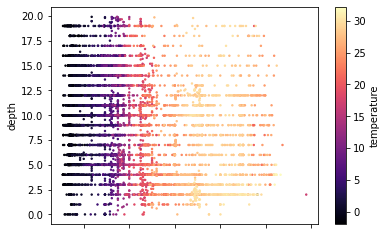

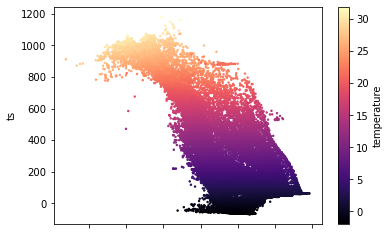

In [21]:
# transect
# plot.scatter('x-axis', 'y-axis')
data[surface].plot.scatter('latitude', 'depth', s=2, c='temperature', cmap='magma')
data.plot.scatter('tco2', 'ts', s=2, c='temperature', cmap='magma')

<AxesSubplot:ylabel='Frequency'>

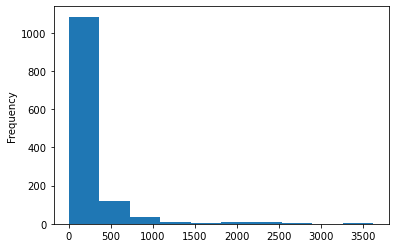

In [22]:
# make a histogram for a specific column
cocco['Coccolith [#/ml]'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

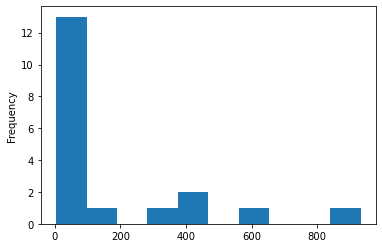

In [23]:
# subset columns and rows with .loc['row', 'column']
cocco.loc[cocco['PI'] == 'Daniels' , 'Coccolith [#/ml]'].plot.hist()

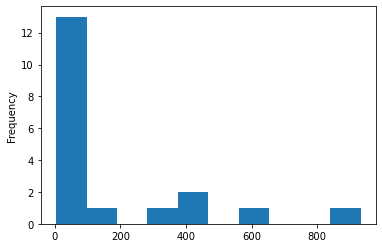

In [25]:
# rename columns, make a renaming dictionary
mapper = {'Coccolith [#/ml]' : 'coccolith_count',
          'E. huxleyi [#/ml]' : 'ehux_count'}
cocco = cocco.rename(columns=mapper)
cocco.loc[cocco['PI'] == 'Daniels' , 'coccolith_count'].plot.hist()

#Save with new column names
cocco.to_csv('../raw_data//Poulton_v2.csv')

<AxesSubplot:xlabel='Time'>

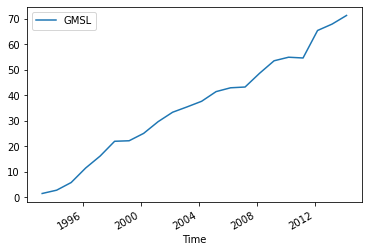

In [26]:
# read an excel file
#tell which column is the index (otherwise it will number it from 1 to ...)
#let it recognize dates with parse_dates
msl = pd.read_excel(
    '../raw_data/csiro_alt_gmsl_yr_2015.xlsx',
    index_col=0, parse_dates=True)
msl.plot()